## Simulate wc_lang model with wc_sim

In [1]:
import os
import tempfile
from argparse import Namespace
import matplotlib.pyplot as plt
# allow embedded plots in the notebook
%matplotlib inline

### import simulate and run results

In [2]:
from wc_sim.multialgorithm.__main__ import SimController
from wc_sim.multialgorithm.run_results import RunResults

### Select a tiny model 

In [3]:
model_filename = os.path.join(os.getcwd(), '../../tests/multialgorithm/fixtures',
                              '2_species_1_reaction_with_rates_given_by_reactant_population.xlsx')
model_filename = os.path.join(os.getcwd(), '../../tests/multialgorithm/fixtures', '2_species_1_reaction.xlsx')

### Set up the inputs

In [4]:
checkpoints_dir = tempfile.mkdtemp()
args = Namespace(
    model_file=model_filename,
    end_time=10000,
    checkpoint_period=50,
    checkpoints_dir=checkpoints_dir
)
SimController.process_and_validate_args(args)

checkpoints_dir /tmp/tmps8w5apzv


### Simulate

In [5]:
# simulate
num_events, results_dir = SimController.simulate(args)

Simulated 10293 events
Saved checkpoints and run results in '/tmp/tmps8w5apzv/2018-05-23-23-53-19'


/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:1471 PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->bytes,key->values] [items->None]

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:1471 PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->values] [items->None]



In [6]:
# view results
run_results = RunResults(results_dir)

In [7]:
print(run_results.get('populations'))

         spec_type_0[c]  spec_type_1[c]
0.0           1000000.0       1000000.0
50.0           999947.0       1000053.0
100.0          999892.0       1000108.0
150.0          999849.0       1000151.0
200.0          999805.0       1000195.0
250.0          999757.0       1000243.0
300.0          999714.0       1000286.0
350.0          999666.0       1000334.0
400.0          999614.0       1000386.0
450.0          999559.0       1000441.0
500.0          999508.0       1000492.0
550.0          999460.0       1000540.0
600.0          999418.0       1000582.0
650.0          999358.0       1000642.0
700.0          999296.0       1000704.0
750.0          999247.0       1000753.0
800.0          999191.0       1000809.0
850.0          999147.0       1000853.0
900.0          999111.0       1000889.0
950.0          999057.0       1000943.0
1000.0         999011.0       1000989.0
1050.0         998960.0       1001040.0
1100.0         998917.0       1001083.0
1150.0         998868.0       1001132.0


In [8]:
print(run_results._hdf_file())

/tmp/tmps8w5apzv/2018-05-23-23-53-19/run_results.h5


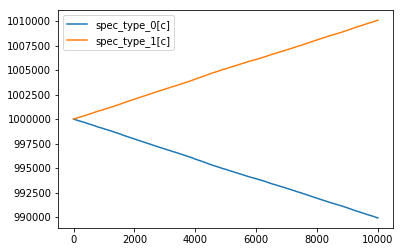

In [9]:
axes = run_results.get('populations').plot()